#  Introduction:
The growth of customer service evaluation through data-driven approaches has become essential in today’s service industries, including healthcare. This case study focuses on natural language processing (NLP) to analyze the customer service experience within dental practices in New York City. Using a dataset sourced from Yellow Pages, which contains close to 1,000 entries on dental services, this study explores multiple facets of NYC's dental care landscape. Key data points such as the names, addresses, phone numbers, websites, customer ratings, and review snippets of dental practices are included, offering a rich basis for analysis. The dataset serves as a valuable tool for data science applications such as sentiment analysis, geographic service distribution studies, and trend spotting in dental care quality. By combining textual insights from patient reviews with numerical customer satisfaction data, we aim to enhance understanding of the factors that influence patient experience and dental service quality in New York City.

# Columns 
-  Name: The dental practice's name.
-  Address: Location details of the practice.
-  Phone: Contact number.
-  Website: Online presence of the practice.
-  Rating: Customer ratings.
-  ReviewSnippet: Extracts from customer reviews, included for their insight into patient sentiments and experiences, despite some being incomplete.

# Step 1: Import The key Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-language-processing-in-customer-service/yellow_pages_nyc_dentists_2024.csv


In [2]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Read the DataSet

In [25]:
natural = pd.read_csv('/kaggle/input/natural-language-processing-in-customer-service/yellow_pages_nyc_dentists_2024.csv')
print("Full train dataset shape is {}".format(natural.shape))

Full train dataset shape is (1000, 6)


# Step 3. Basic Data View / Exploration

In [5]:
natural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   address        1000 non-null   object 
 2   phone          1000 non-null   object 
 3   website        680 non-null    object 
 4   rating         223 non-null    float64
 5   reviewSnippet  223 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


-- observation:
1. we could understand that here missing values exists in this dataset
-    website        680 
-    rating         223 
-    reviewSnippet  223

In [6]:
natural.dtypes

name              object
address           object
phone             object
website           object
rating           float64
reviewSnippet     object
dtype: object

In [7]:
natural.sample(10)

,name,address,phone,website,rating,reviewSnippet
606,Azadeh Akhavan DDS,"551 5th Ave, New York, NY 10017",(212) 764-0440,https://drakhavandental.com,NaN,NaN
429,Samuel Rudick DDS,"350 Central Park W Apt 1E, New York, NY 10025",(212) 678-1144,NaN,5.0,"Great guy, and even better dentist. He is ver..."
5,"Dr. Simon W. Rosenberg, DMD","399 E 72nd St Apt 1a, New York, NY 10021",(212) 988-8822,http://www.drsimonrosenberg.com,5.0,Had a minor dental emergency while on holiday ...
970,"Angela Wu, DMD","111 John St Rm 530, Peck Slip, NY 10038",(212) 619-7899,NaN,NaN,NaN
871,"Kung, Bonnie B, DDS","180 Park Row Lbby 2, New York, NY 10038",(212) 385-9399,http://sdnyofficespace.com,NaN,NaN
105,East Side Smiles,"333 E 79th St, New York, NY 10075",(212) 744-5544,http://www.eastsidesmilesnyc.com,NaN,NaN
559,"Dr. Scott Pope, DDS",251 East 33rd Street Ground Floor Ny Ny 10016...,(212) 889-5544,https://www.coliseumdental.com,NaN,NaN
465,"Francine Estrada, DDS","57 W 57th St Ste 1405, New York, NY 10019",(212) 245-8066,NaN,5.0,She is really nice and made sure I was comfort...
719,"Dr. Emanuel Layliev, DDS","128 E 71st St Apt 2, New York, NY 10021",(212) 288-4455,http://www.nyccd.com/about-nyccd/dr-emanuel-la...,NaN,NaN
48,"Alice Urbankova DDS, P","630 5th Ave Ste 1860, New York, NY 10111",(212) 765-7340,https://www.preserveyourteeth.com,5.0,Dr. Urbankova is an angel disguised as a denti...


In [8]:
natural.head()

,name,address,phone,website,rating,reviewSnippet
0,Manhattan Dentist,"551 5th Ave Rm 1114, New York, NY 10176",(917) 503-9164,https://www.manhattannydentist.com,NaN,NaN
1,David A Nusblatt,"10 E 40th St, New York, NY 10016",(212) 473-2164,http://www.nusblattdental.com,5.0,Dr. David A. Nusblatt's involvement further en...
2,Preferred Dental Care of Chelsea,"135 W 27th St, New York, NY 10001",(646) 759-4489,http://www.chelseadentalcare.com,4.0,I visited the dental clinic for a cleaning app...
3,"Joanna Tricorache, DDS","31 Washington Sq W, New York, NY 10011",(646) 835-0172,http://www.teeththatsparkle.com,5.0,The use of modern dental technology at Dr. Tri...
4,Herald Square Dental & The Denture Center,"224 W 35th St Fl 16, New York, NY 10001",(212) 689-0024,http://www.heraldsquaredental.com,5.0,Dr. Pasch is wonderful!! Best fitting dentures...


# observation
- #  Find the Descriptive Statistics:
 - Calculate mean, median, and standard deviation of severity levels. And analyse it 

In [9]:
natural.describe()

,rating
count,223.000000
mean,4.917040
std,0.403896
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


# step 4: Data preprocessing - clean

1. missing value handling
2. drop unwanted

In [10]:
natural.columns

Index(['name', 'address', 'phone', 'website', 'rating', 'reviewSnippet'], dtype='object')

In [11]:
natural.drop_duplicates(inplace=True)

In [12]:
natural.isnull().sum()

name               0
address            0
phone              0
website          311
rating           762
reviewSnippet    762
dtype: int64

In [13]:
lst = list(natural.isnull().sum())
lst

[0, 0, 0, 311, 762, 762]

In [14]:
cols = list(natural.columns)
cols

['name', 'address', 'phone', 'website', 'rating', 'reviewSnippet']

In [15]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst [i]> 0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col, missing_rows

(['website', 'rating', 'reviewSnippet'], [311, 762, 762])

# Missing value handling

In [16]:
natural.isnull().sum()

name               0
address            0
phone              0
website          311
rating           762
reviewSnippet    762
dtype: int64

In [17]:
natural.website.fillna("Unknown", inplace=True)
natural.rating.fillna("Unknown", inplace=True)
natural.reviewSnippet.fillna("Unknown", inplace=True)

/tmp/ipykernel_30/3556314441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  natural.website.fillna("Unknown", inplace=True)
/tmp/ipykernel_30/3556314441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [18]:
natural.isnull().sum()

name             0
address          0
phone            0
website          0
rating           0
reviewSnippet    0
dtype: int64

#  Step 5: EDA (Explorative Data Analytics)
- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations.

In [19]:
# Convert 'rating' column to numeric if it's not already
natural['rating'] = pd.to_numeric(natural['rating'], errors='coerce')

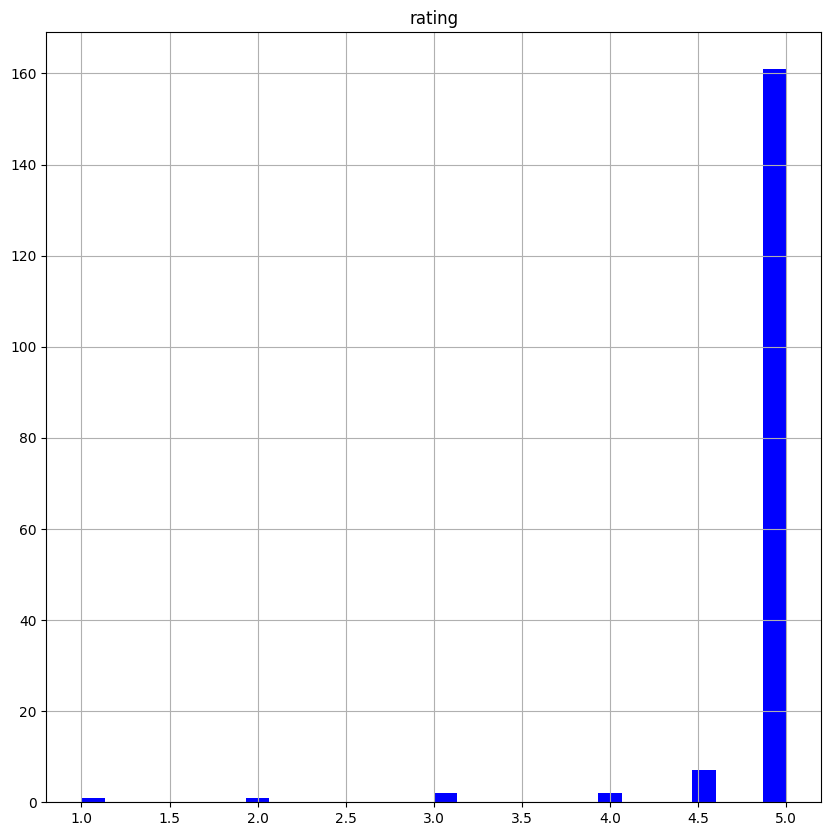

In [20]:
natural[['rating']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

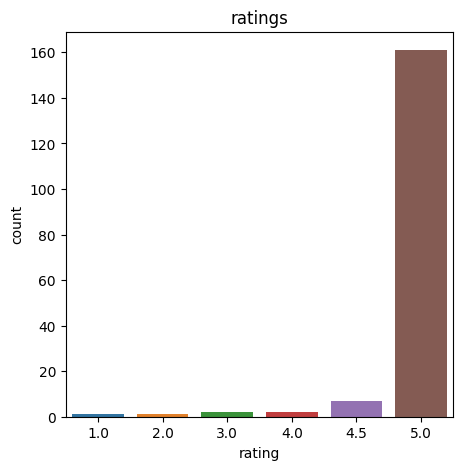

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='rating', data=natural)
plt.title('ratings')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


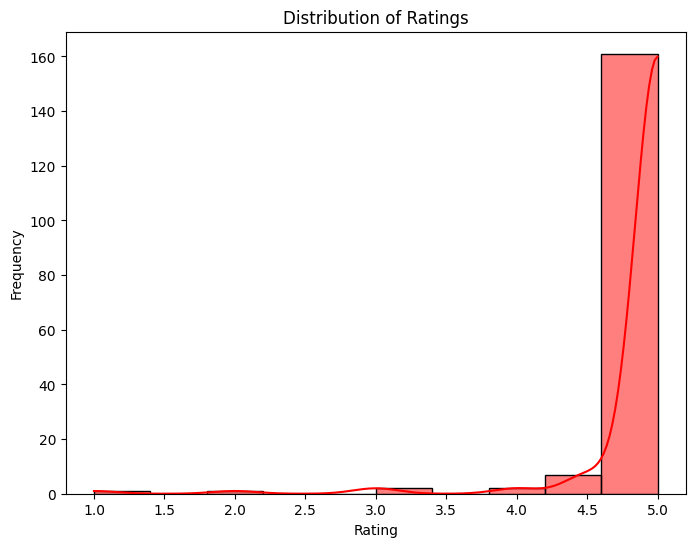

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(natural['rating'], bins=10, kde=True, color='red')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


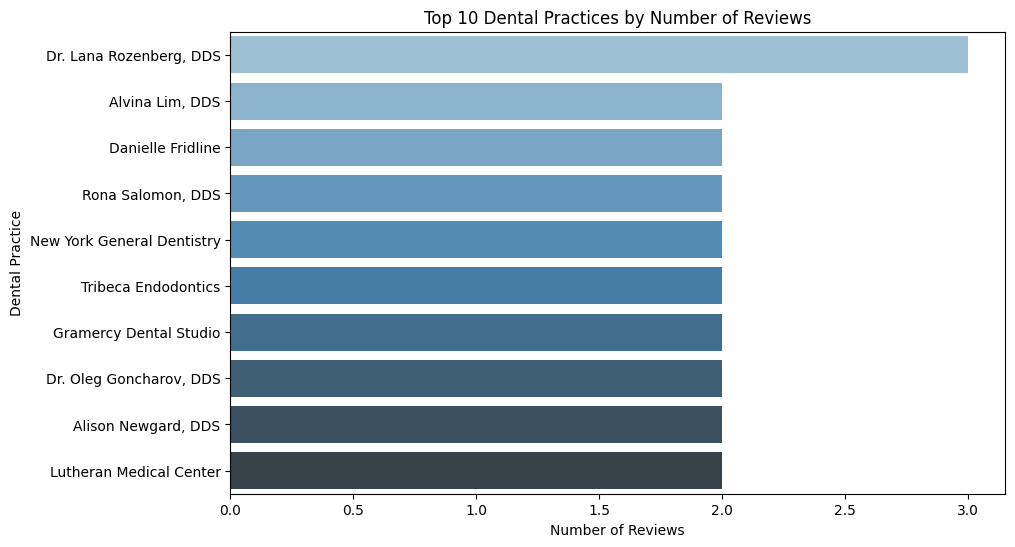

In [23]:
# Count the number of reviews per dental practice
top_practices = natural['name'].value_counts().head(10)

# Plot the top dental practices by review count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_practices.values, y=top_practices.index, palette="Blues_d")
plt.title('Top 10 Dental Practices by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Dental Practice')
plt.show()


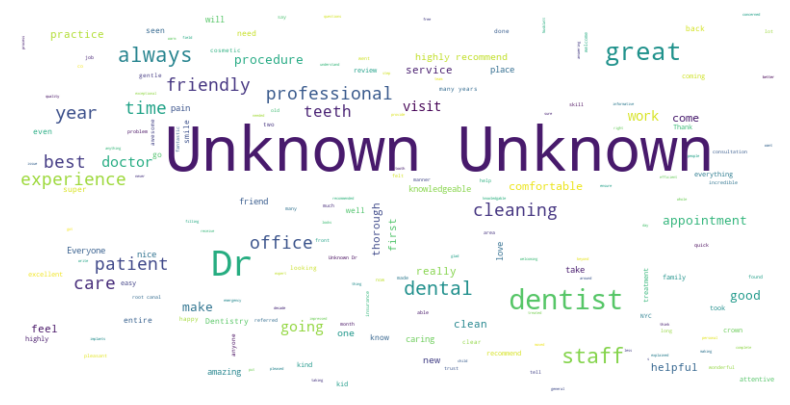

In [24]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(natural['reviewSnippet'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusion:
This case study demonstrates the potential of natural language processing (NLP) in improving customer service evaluations within the dental care industry. By analyzing the textual and numerical data in this dataset, several meaningful insights can be derived, including customer sentiment trends, geographic distribution of service quality, and key factors driving patient satisfaction. The ability to predict customer satisfaction based on both textual reviews and structured data could help dental practices optimize their services. Furthermore, this research highlights the importance of ethically sourced data in improving customer service analysis. As dental practices continue to strive for better patient outcomes, applying data science techniques such as sentiment analysis and predictive modeling can significantly enhance customer satisfaction and service quality across New York City.